In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [6]:
omega_m, chi2 = np.load("/home/gabriele/astrocosmolib/chi2_values.npy")

In [5]:
interp_chi2 = interp1d(omega_m, chi2, kind = "cubic")

In [8]:
def MCMC(x0, n_steps, x_min, x_max):
    
    chain = []
    acceptance = []
    chi2_chain = []

    chain.append(x0)
    acceptance.append(True)
    chi2_chain.append(interp_chi2(x0))

    for i in tqdm(range(n_steps)):

        x_try = np.random.uniform(x_min, x_max)

        f_try = interp_chi2(x_try)
        f_old = chi2_chain[-1]

        log_ratio = f_old - f_try
        log_u = np.log(np.random.uniform())

        if log_u < log_ratio:

            chain.append(x_try)
            chi2_chain.append(f_try)
            acceptance.append(True)

        else:

            chain.append(chain[-1])
            chi2_chain.append(chi2_chain[-1])
            acceptance.append(False)
    
    return chain, chi2_chain, acceptance




In [9]:
x_min = 0.23
x_max = 0.37
n_steps = 100000
x0 = 0.26
chain, chi2_chain, acceptance = MCMC(x0, n_steps, x_min, x_max)

100%|██████████| 100000/100000 [00:06<00:00, 14481.71it/s]


In [10]:
print("Acceptance rate: ", np.sum(acceptance))

Acceptance rate:  14015


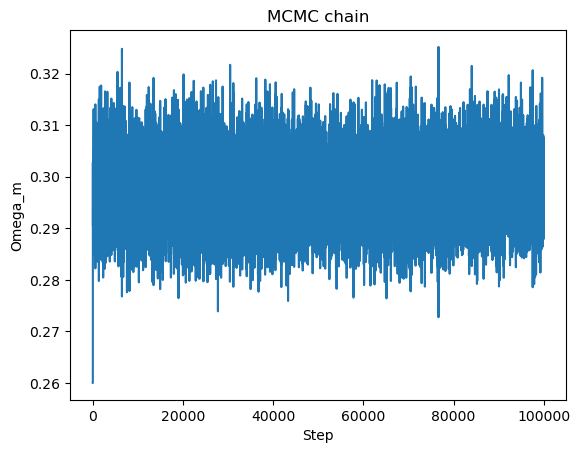

In [11]:
plt.plot(range(len(chain)), chain)
plt.xlabel("Step")
plt.ylabel("Omega_m")
plt.title("MCMC chain")
plt.show()

In [12]:
print("omega_m : {mean:2.4f} +/- {std:2.4f}".format(mean = np.mean(chain[:10000]), std = np.std(chain[:10000])))

omega_m : 0.2976 +/- 0.0064
